In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly

In [2]:
df=pd.read_csv("E95_price_1.csv")
df

,year,E95
0,1/1/2019,17800
1,1/16/2019,17600
2,1/31/2019,17600
3,2/15/2019,17600
4,3/2/2019,18540
...,...,...
102,11/11/2022,23860
103,11/21/2022,23780
104,12/1/2022,22700
105,12/12/2022,21200


In [3]:
df.index = df['year']

In [4]:
df['Time'] = np.arange(len(df.index))
df.tail()

,year,E95,Time
year,,,
11/11/2022,11/11/2022,23860,102
11/21/2022,11/21/2022,23780,103
12/1/2022,12/1/2022,22700,104
12/12/2022,12/12/2022,21200,105
12/21/2022,12/21/2022,20700,106


<AxesSubplot:xlabel='year'>

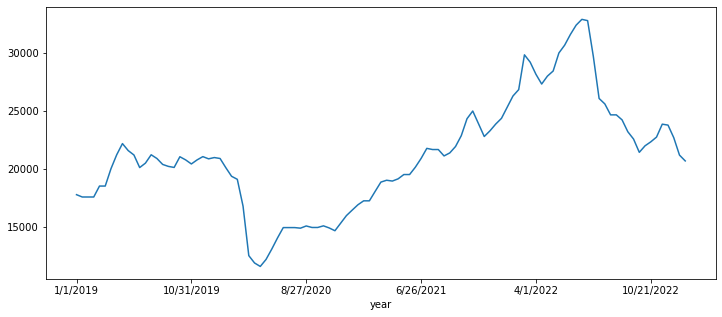

In [5]:
df['E95'].plot(figsize=(12,5))

In [6]:
X = np.array(df.Time, dtype = float)
y = np.array(df.E95, dtype = float)
Z = []

In [7]:
no_of_predictions = 0
coefs = poly.polyfit(X,y,3)
X_train = np.linspace(X[0], X[-1]+no_of_predictions, num=len(X)+no_of_predictions)
fit = poly.polyval(X_train, coefs)
pred = poly.polyval(Z, coefs)
predictions = pd.DataFrame(Z,pred)

Empty DataFrame
Columns: []
Index: []


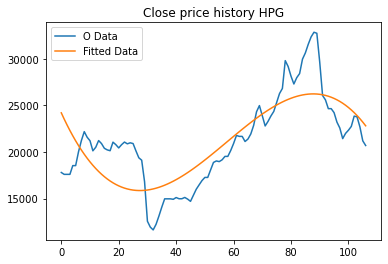

In [8]:
print(predictions)
plt.plot(y,label="O Data")
plt.plot(fit,label = "Fitted Data")
plt.legend(loc='upper left')
plt.title("Close price history HPG")
plt.show()

In [9]:
import numpy as np 
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error
d = X - y
mse_f = np.mean(d**2)
mae_f = np.mean(abs(d))
rmse_f = np.sqrt(mse_f)
r2_f = 1-(sum(d**2)/sum((y-np.mean(y))**2))

print("Results by manual calculation:")
print("MAE:",mae_f)
print("MSE:", mse_f)
print("RMSE:", rmse_f)
print("R-Squared:", r2_f)

mae = metrics.mean_absolute_error(X, y)
mse = metrics.mean_squared_error(X, y)
rmse = np.sqrt(mse) #mse**(0.5)  
mape = mean_absolute_percentage_error(X,y)
r2 = metrics.r2_score(X,y)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAPE:",mape)
print("R-Squared:", r2)

Results by manual calculation:
MAE: 21064.570093457944
MSE: 466023330.85046726
RMSE: 21587.573528548022
R-Squared: -19.732402770967358
Results of sklearn.metrics:
MAE: 21064.570093457944
MSE: 466023330.85046726
RMSE: 21587.573528548022
MAPE: 7.491969473569619e+17
R-Squared: -488493.05749524874
